In [2]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np 


In [3]:
file='/workspaces/EDA-repo/all_jails.csv'
data=pd.read_csv(file, encoding='unicode_escape')
data.head()

,id,fips,statecode,state,state_notes,county,jail,jail_notes,d2008,d2009,...,med2010,med2011,med2012,med2013,med2014,med2015,med2016,med2017,med2018,med2019
0,1,1003.0,AL,Alabama,NaN,Baldwin,Baldwin County Corr. Center,NaN,0.0,0.0,...,public,public,public,public,public,public,public/Quality Correctional Health Care,Quality Correctional Health Care,Quality Correctional Health Care,Quality Correctional Health Care
1,2,1015.0,AL,Alabama,NaN,Calhoun,Calhoun County Jail,NaN,0.0,1.0,...,public,public,public,public,public,public/Quality Correctional Health Care,Quality Correctional Health Care,Quality Correctional Health Care/Southern Heal...,Southern Health Partners,Southern Health Partners
2,3,1055.0,AL,Alabama,NaN,Etowah,Etowah County Detention Center,NaN,0.0,0.0,...,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,NaN
3,4,1069.0,AL,Alabama,NaN,Houston,Houston County Jail,NaN,1.0,0.0,...,public,public,public,public,public,public,public,public,public,public
4,5,1073.0,AL,Alabama,NaN,Jefferson,Jefferson County Birmingham Jail,ADP for 2008 was based on data provided by the...,NaN,NaN,...,Health Assurance,Health Assurance/Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Columns: 116 entries, id to med2019
dtypes: float64(97), int64(1), object(18)
memory usage: 474.1+ KB


In [5]:
data['state'].nunique()

45

In [6]:
date_range= range(2009, 2020)
causes={'d':'total', 'su':'suicide', 'da':'drug_alcohol', 'il':'illness', 'o':'other', 'ho':'homocide', 'ac':'accidental'}
avg_daily_pop='adp'

In [7]:
# Columns with causes of death
cause_col = [f"{cause}{year}" for cause in causes for year in date_range]

# Column for daily average inmate population
adp_col = [f"{avg_daily_pop}{year}" for year in date_range]

# Keeping useful columns
data = data[['state'] + adp_col + cause_col]

data.head()


,state,adp2009,adp2010,adp2011,adp2012,adp2013,adp2014,adp2015,adp2016,adp2017,...,ac2010,ac2011,ac2012,ac2013,ac2014,ac2015,ac2016,ac2017,ac2018,ac2019
0,Alabama,601.0,551.0,555.0,618.0,662.0,592.0,584.0,538.0,540.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alabama,531.0,555.0,532.0,468.0,445.0,405.0,440.0,447.0,514.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alabama,853.0,808.0,820.0,788.0,840.0,787.0,722.0,723.0,857.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,Alabama,496.0,569.0,334.0,370.0,330.0,354.0,288.0,298.0,282.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alabama,976.0,1189.0,1189.0,1331.0,1306.0,1050.0,790.0,744.0,777.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#fill missing values for adp column
data[adp_col]=data[adp_col].fillna(0)

#fill missing values for cause column
data[cause_col]=data[cause_col].fillna(0)

data.head()

,state,adp2009,adp2010,adp2011,adp2012,adp2013,adp2014,adp2015,adp2016,adp2017,...,ac2010,ac2011,ac2012,ac2013,ac2014,ac2015,ac2016,ac2017,ac2018,ac2019
0,Alabama,601.0,551.0,555.0,618.0,662.0,592.0,584.0,538.0,540.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alabama,531.0,555.0,532.0,468.0,445.0,405.0,440.0,447.0,514.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alabama,853.0,808.0,820.0,788.0,840.0,787.0,722.0,723.0,857.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alabama,496.0,569.0,334.0,370.0,330.0,354.0,288.0,298.0,282.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alabama,976.0,1189.0,1189.0,1331.0,1306.0,1050.0,790.0,744.0,777.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data=data.groupby('state').sum().reset_index()
data.head()

,state,adp2009,adp2010,adp2011,adp2012,adp2013,adp2014,adp2015,adp2016,adp2017,...,ac2010,ac2011,ac2012,ac2013,ac2014,ac2015,ac2016,ac2017,ac2018,ac2019
0,Alabama,8770.56,8740.67,8485.79,9058.46,9069.93,8318.17,7661.36,7343.64,7750.81,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Arizona,14627.30,13098.58,13113.53,13783.97,14183.01,13671.93,13440.18,12985.08,12934.45,...,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
2,Arkansas,4077.98,4338.58,3817.71,3946.14,4355.48,4701.09,4592.32,4465.69,4593.46,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,California,64732.00,58814.00,56685.00,62472.00,66334.00,65165.00,59248.00,59412.00,59842.00,...,0.0,2.0,1.0,6.0,4.0,6.0,4.0,1.0,1.0,2.0
4,Colorado,9787.77,9503.50,9247.94,9391.11,9636.71,9208.14,9322.79,9361.88,10154.60,...,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0


In [10]:
mean_state=pd.DataFrame({'state':data['state']})
mean_state['adp']=data[adp_col].mean(axis=1)

for a, b in causes.items():
    cols=[f'{a}{year}' for year in date_range]
    mean_state[b]=100000 * data[cols].mean(axis=1)/mean_state['adp']


mean_state.head()

,state,adp,total,suicide,drug_alcohol,illness,other,homocide,accidental
0,Alabama,8326.249091,82.979633,22.928583,10.918373,41.489816,0.000000,1.091837,1.091837
1,Arizona,12677.560000,131.943944,38.722679,10.039213,61.669452,7.170867,8.605040,3.585433
2,Arkansas,4380.303636,141.127618,47.734341,29.055686,53.960560,0.000000,4.150812,4.150812
3,California,60994.955455,169.313555,36.962818,14.159144,81.675905,4.620352,8.495486,4.620352
4,Colorado,9594.840000,164.861340,60.638654,14.212185,76.745796,6.632353,3.789916,3.789916


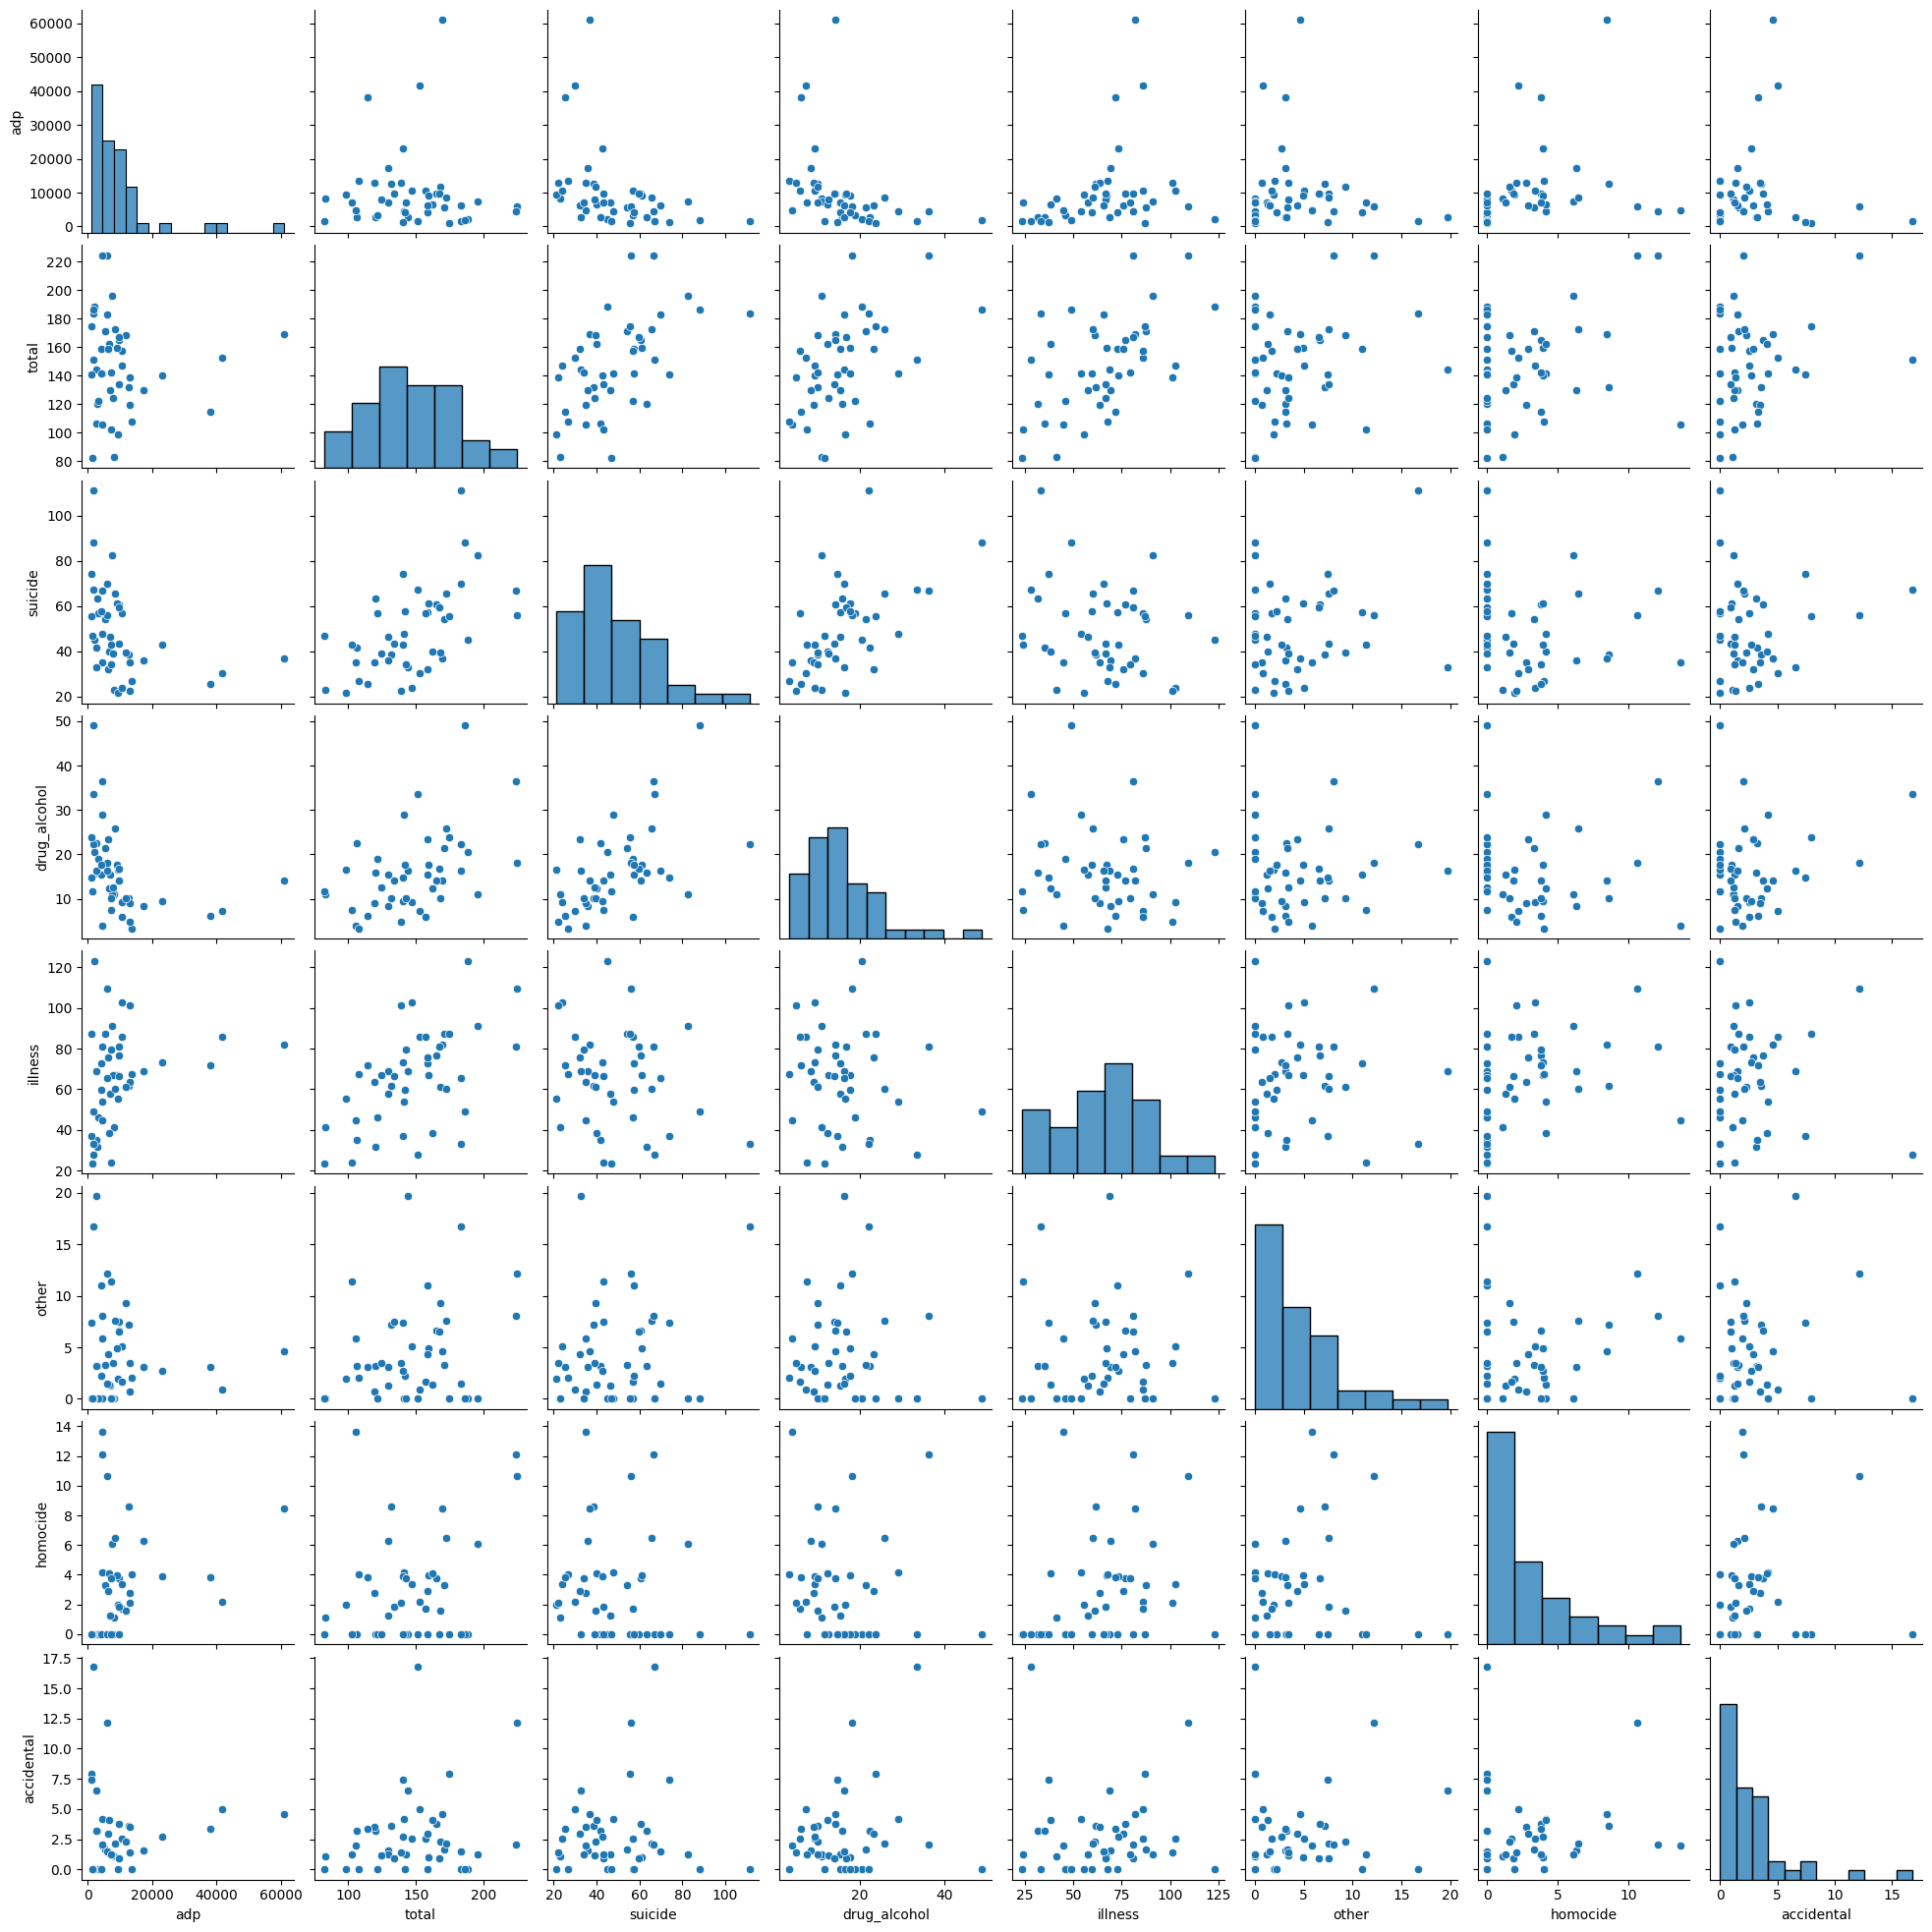

In [14]:
#Pairplot
sns.pairplot(data=mean_state)
plt.show()

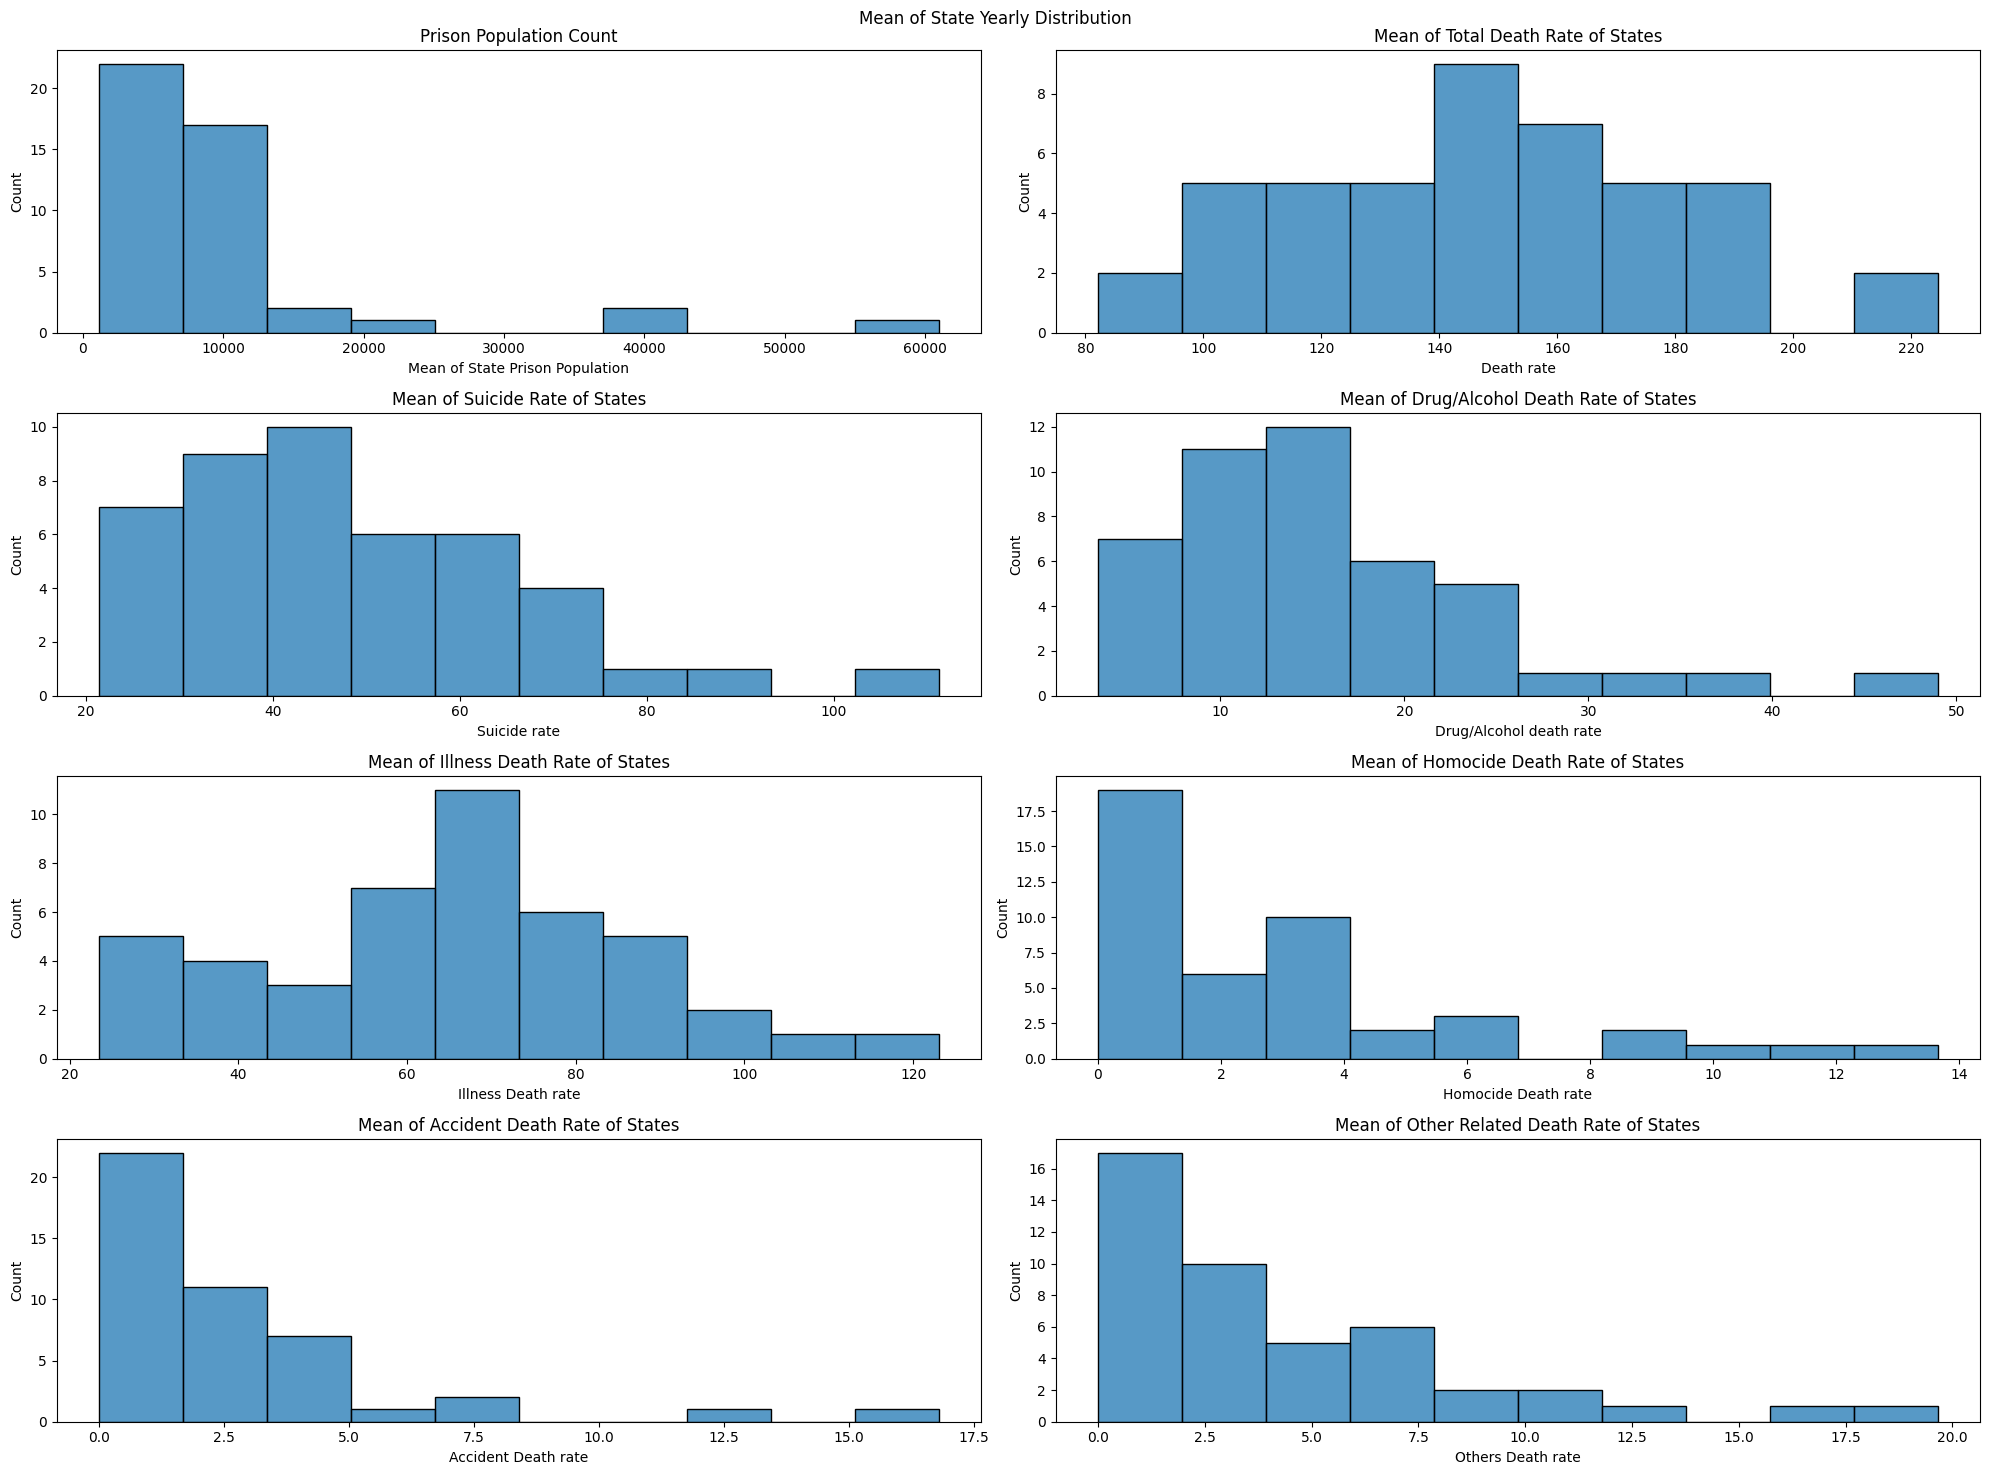

In [18]:
fig,ax=plt.subplots(4,2, figsize=(20,15))

#Mean of State
sns.histplot(data=mean_state['adp'], bins=10 , ax=ax[0,0])
ax[0,0].set_title('Prison Population Count')
ax[0,0].set_xlabel('Mean of State Prison Population')

#Mean of total death
sns.histplot(data=mean_state['total'], bins=10, ax=ax[0,1])
ax[0,1].set_title('Mean of Total Death Rate of States')
ax[0,1].set_xlabel('Death rate')

#Mean of suicide
sns.histplot(data=mean_state['suicide'], bins=10, ax=ax[1,0])
ax[1,0].set_title('Mean of Suicide Rate of States')
ax[1,0].set_xlabel('Suicide rate')

#Mean of Drug/alcohol
sns.histplot(data=mean_state['drug_alcohol'], bins=10, ax=ax[1,1])
ax[1,1].set_title('Mean of Drug/Alcohol Death Rate of States')
ax[1,1].set_xlabel('Drug/Alcohol death rate')

#Mean of illness
sns.histplot(data=mean_state['illness'], bins=10, ax=ax[2,0])
ax[2,0].set_title('Mean of Illness Death Rate of States')
ax[2,0].set_xlabel('Illness Death rate')

#Mean of homicide
sns.histplot(data=mean_state['homocide'], bins=10, ax=ax[2,1])
ax[2,1].set_title('Mean of Homocide Death Rate of States')
ax[2,1].set_xlabel('Homocide Death rate')

#Mean of accidents
sns.histplot(data=mean_state['accidental'], bins=10, ax=ax[3,0])
ax[3,0].set_title('Mean of Accident Death Rate of States')
ax[3,0].set_xlabel('Accident Death rate')

#Mean of others
sns.histplot(data=mean_state['other'], bins=10, ax=ax[3,1])
ax[3,1].set_title('Mean of Other Related Death Rate of States')
ax[3,1].set_xlabel('Others Death rate')

fig.suptitle('Mean of State Yearly Distribution')

fig.tight_layout()
plt.show()





